In [415]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import wastingtime

%matplotlib inline

** Read all required csv **

In [416]:
atusact = pd.read_csv('data/atusact_2014.dat')
atuscps = pd.read_csv('data/atuscps_2014.dat')
atusresp = pd.read_csv('data/atusresp_2014.dat')
atusrost = pd.read_csv('data/atusrost_2014.dat')
atusrostec = pd.read_csv('data/atusrostec_2014.dat')
atussum = pd.read_csv('data/atussum_2014.dat')
atuswho = pd.read_csv('data/atuswho_2014.dat')

** Take out necessary variables **

In [417]:
roster = atusrost[['TUCASEID','TULINENO', 'TEAGE', 'TESEX']].copy()
respondent = atusresp[['TUCASEID','TULINENO','TEHRFTPT', 'TRTEC', 'TRCHILDNUM']]
activity = atusact[['TUCASEID', 'TUACTDUR24', 'TRTEC_LN', 'TRCODE', 'TUACTIVITY_N']]
roster_elder = atusrostec[['TUCASEID', 'TULINENO', 'TEAGE_EC', 'TEELDUR', 'TEELWHO']]

** Calculate weighted age of elder care recipients **

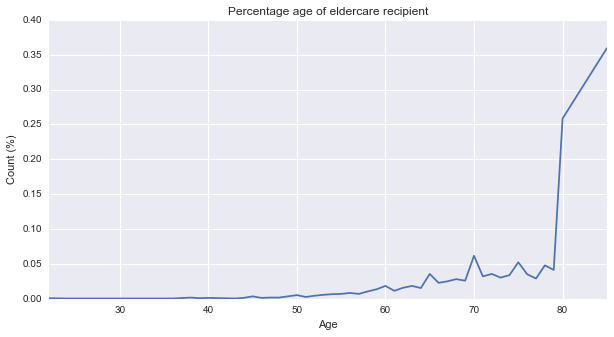

In [418]:
group_by_age = roster_elder.groupby(['TEAGE_EC']).size()
percentage_of_recipient = group_by_age/(roster_elder['TEAGE_EC'].sum())*100
ax = percentage_of_recipient.plot(title = 'Percentage age of eldercare recipient', figsize=(10,5))
ax.set_xlabel("Age")
ax.set_ylabel("Count (%)")

This graph indicates the percentage of age of eldercare recipents. As shown above, majority of the person being taken care of is 80 years and older.

** Figure out who the respondent is providing care to (Who is not living with the respondent)**

In [419]:
give_care_to = roster_elder.groupby(['TEELWHO']).size()
give_care_to = pd.DataFrame(give_care_to, columns=['TOT_TEEL'])

(-1.25, 1.25, -1.25, 1.25)

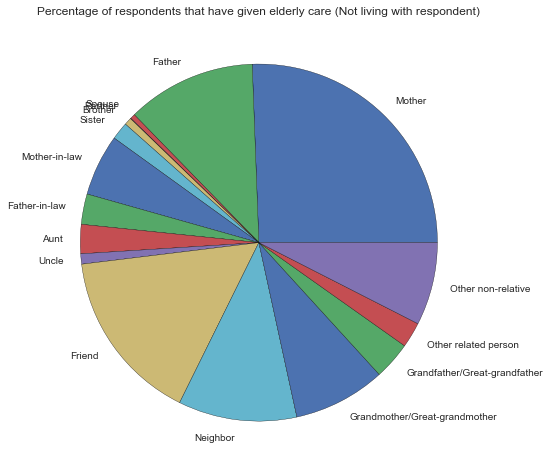

In [420]:
not_living_respondent = give_care_to[9:]

weighted_not_living_respondent = not_living_respondent['TOT_TEEL']/2692
w = weighted_not_living_respondent.plot(kind='pie',
                                    title = 'Percentage of respondents that have given elderly care (Not living with respondent)', 
                                    figsize=(8,8),  
                                    legend=False,
                                    labels=['Mother', 
                                             'Father', 
                                             'Spouse', 
                                             'Partner', 
                                             'Brother', 
                                             'Sister',
                                             'Mother-in-law',
                                             'Father-in-law',
                                             'Aunt',
                                             'Uncle',
                                             'Friend',
                                             'Neighbor',
                                             'Grandmother/Great-grandmother',
                                             'Grandfather/Great-grandfather',
                                             'Other related person',
                                             'Other non-relative'])

w.axis('off')

The respondents have said they have given elderly care to their mother followed by their friend and neigbour/father. This could mean the respondent could have went to visit their recipent at a nursing home or at the recipents home or perhaps helped their neighbour with some elderly care.

** Figure out who the respondent is providing care to (Who is living with the respondent) **

(-1.25, 1.25, -1.25, 1.25)

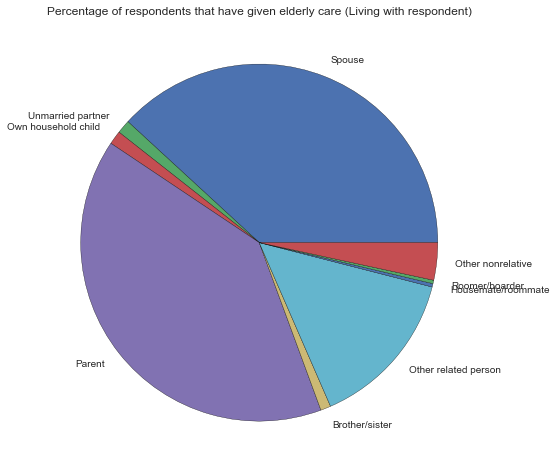

In [421]:
living_w_respondent = give_care_to[:9]
weighted_living_w_respondent = living_w_respondent['TOT_TEEL']/325 * 100
wl = weighted_living_w_respondent.plot(kind='pie',
                                    title = 'Percentage of respondents that have given elderly care (Living with respondent)', 
                                    figsize=(8,8),  
                                    legend=False,
                                    labels=['Spouse', 
                                             'Unmarried partner', 
                                             'Own household child', 
                                             'Parent',
                                             'Brother/sister',
                                             'Other related person',
                                             'Housemate/roommate',
                                             'Roomer/boarder',
                                             'Other nonrelative'])

wl.axis('off')

Compared to people who were recieving some type of elderly care outside of the respondent's home, we looked at people who are living with their respondent. This chart shows the highest percentage of the respondent taking care of their spouse at 40% and 38% for parents.

** Merge tables together and take all respondent's information **

In [422]:
main_respondent = roster[roster['TULINENO'] == 1]
elder = pd.merge(pd.merge(main_respondent, respondent, on='TUCASEID'), roster_elder, on='TUCASEID')
elder.head()

,TUCASEID,TULINENO_x,TEAGE,TESEX,TULINENO_y,TEHRFTPT,TRTEC,TRCHILDNUM,TULINENO,TEAGE_EC,TEELDUR,TEELWHO
0,20140101140168,1,23,2,1,-1,-1,1,-1,77,2,48
1,20140101140559,1,27,1,1,-1,-1,1,-1,73,4,47
2,20140101140559,1,27,1,1,-1,-1,1,-1,54,4,34
3,20140101140852,1,67,1,1,-1,-1,0,-1,85,1,44
4,20140101140872,1,45,2,1,-1,-1,3,-1,76,4,39


** Curious about the age difference between the recipient and respondent **

In [423]:
elder['AGE_DIFF'] = elder['TEAGE'] - elder['TEAGE_EC']
elder = elder[elder['TRTEC'] > 0]
elder['AGE_DIFF'].mean()

-20.140625

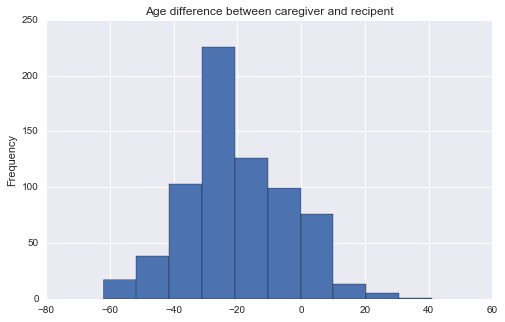

In [424]:
elder['AGE_DIFF'].plot.hist(title = 'Age difference between caregiver and recipent', 
                                    figsize=(8,5))

The negative value indicates the caregiver is younger than the recipent they are caring for. The average age difference is about 20 years younger. The average age of the caregiver of 54 years old and the recipent is approximately 74 years old.

** Check average age of respondent and recipient **

In [432]:
# elder['TEAGE'].mean()
# elder['TEAGE_EC'].mean()

** Merge neccessary dataframes and filter respondents that provided care **

In [431]:
caregiver_master = pd.merge(roster_elder.merge(activity), respondent, on='TUCASEID')
caregiver_master = elder.merge(activity, on='TUCASEID')

** Take out necessary columns and get the average of each activity **

In [428]:
caregiver_activity = caregiver_master[['TUACTDUR24', 'TRCODE']]
group_by_activity = caregiver_activity.groupby(caregiver_activity['TRCODE']).mean()
group_by_activity = group_by_activity.sort_values('TUACTDUR24', ascending=False)
group_by_activity.index.name = 'activity_code'

group_by_activity = group_by_activity[:10]
group_by_activity

,TUACTDUR24
activity_code,
130203,345.000000
130114,337.500000
29999,310.000000
130118,242.500000
10101,240.237748
130213,240.000000
130112,233.333333
100305,232.500000
150302,216.388889


In [429]:
# group_by_activity['Activity'] = pd.Series(['Watching Basketball', 
#               'Participating in golf', 
#               'Household activities', 
#               'Participating in hunting', 
#               'Sleeping', 
#               'Watching football', 
#               'Participating in fishing', 
#               'Waiting associated with civic obligations & participation', 
#               'Indoor & outdoor maintenance, repair, & clean-up', 
#               'Taking class for degree, certification, or licensure'])

** Change mintues into hours **

In [430]:
group_by_activity['TUACTDUR24'] = group_by_activity['TUACTDUR24'] / 60
group_by_activity

,TUACTDUR24
activity_code,
130203,5.750000
130114,5.625000
29999,5.166667
130118,4.041667
10101,4.003962
130213,4.000000
130112,3.888889
100305,3.875000
150302,3.606481


The top 10 activities on average that respondents who have provided care spend their time on.
* 130203 - Watching Basketball
* 130114 - Participating in golf
* 29999 - Household activities
* 130118 - Participating in hunting
* 10101 - Sleeping
* 130213 - Watching football
* 130112 - Participating in fishing
* 100305 - Waiting associated with civic obligations & participation
* 150302 - Indoor & outdoor maintenance, repair, & clean-up, 
* 60101 - Taking class for degree, certification, or licensure